# Airlines

In [2]:
#Airlines

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.arima_model import ARIMA

=========================================================================

# IMPORTING AND CLEANING

In [3]:
#drug_induced_deaths_1999-2015.csv


#stddata = pd.read_csv('std.csv',  index_col='Year', parse_dates = True).dropna()


data = pd.read_csv('ap.csv')
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
indexedDataset = data.set_index(['Month'])

In [4]:
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
indexedDataset.columns 

Index(['#Passengers'], dtype='object')

In [6]:
indexedDataset.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

C:\Users\Naeemah\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


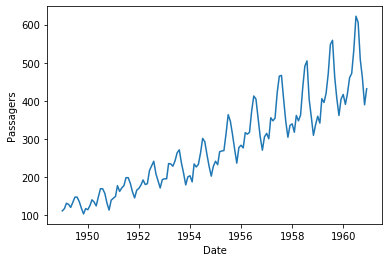

In [7]:
plt.xlabel("Date")
plt.ylabel("Passagers")
plt.plot(indexedDataset)

In [9]:
rolmean  = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

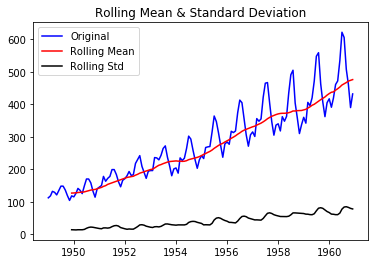

In [10]:
orig = plt.plot(indexedDataset, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color ='black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

#DUE TO THE PLOT, THIS IS NOT STATIONARY

In [11]:
print ('Results of Dickey-Fuller Test: ')
dftest = adfuller(indexedDataset['#Passengers'], autolag ='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used','Number of Obs Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)    
    

Results of Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
#Lags Used               13.000000
Number of Obs Used      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


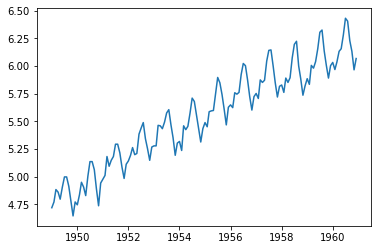

In [12]:
#ESTIMATING TRENDS
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)


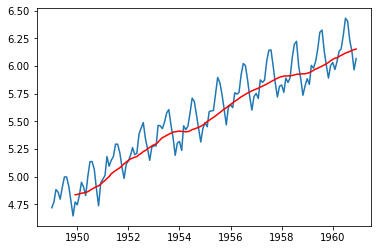

In [13]:
movingAverage = indexedDataset_logscale.rolling(window = 12).mean()
movingSTD = indexedDataset_logscale.rolling(window = 12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color = 'red')

In [19]:
datalogscaleminmovingavg = indexedDataset_logscale - movingAverage
datalogscaleminmovingavg.head()

#REMOVING NAN VALUES
datalogscaleminmovingavg.dropna(inplace=True)
datalogscaleminmovingavg.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #determing rolling statistics 
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used','Number of Obs Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)    
                                     

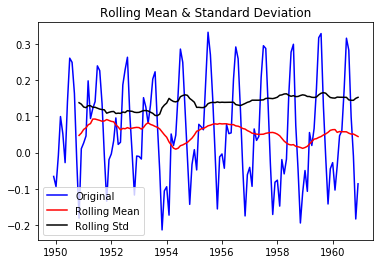

Results of Dickey-Fuller Test:
Test Statistic           -3.162908
p-value                   0.022235
#Lags Used               13.000000
Number of Obs Used      119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [21]:
test_stationary(datalogscaleminmovingavg)

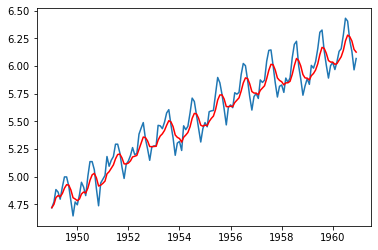

In [22]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife = 2, min_periods = 0, adjust =True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

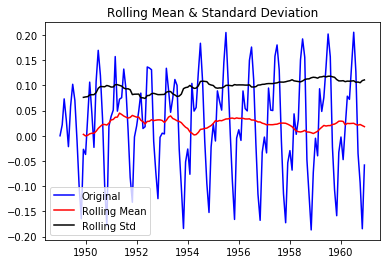

Results of Dickey-Fuller Test:
Test Statistic           -3.087696
p-value                   0.027477
#Lags Used               13.000000
Number of Obs Used      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [23]:
datasetlogscaleminusMovingExponentialDecayAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
test_stationary(datasetlogscaleminusMovingExponentialDecayAverage)

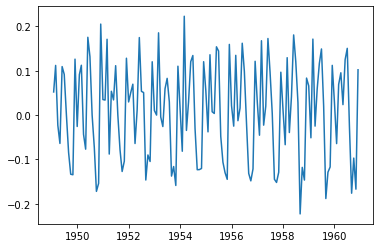

In [24]:
datasetlogdiffshifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetlogdiffshifting)

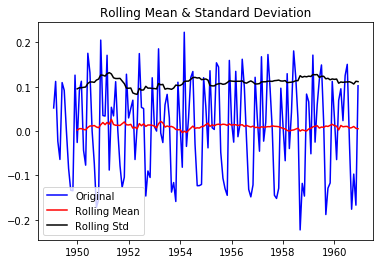

Results of Dickey-Fuller Test:
Test Statistic           -2.717131
p-value                   0.071121
#Lags Used               14.000000
Number of Obs Used      128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [25]:
datasetlogdiffshifting.dropna(inplace = True)
test_stationary(datasetlogdiffshifting)

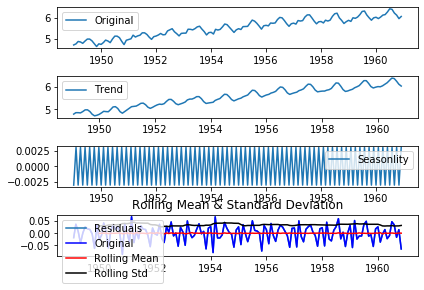

Results of Dickey-Fuller Test:
Test Statistic         -8.258453e+00
p-value                 5.160450e-13
#Lags Used              1.300000e+01
Number of Obs Used      1.280000e+02
Critical Value (1%)    -3.482501e+00
Critical Value (5%)    -2.884398e+00
Critical Value (10%)   -2.578960e+00
dtype: float64


In [26]:
decomposition = seasonal_decompose(indexedDataset_logscale, model='additive', freq=2)
                                   
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonlity')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLogData = residual 
decomposedLogData.dropna(inplace = True)
test_stationary(decomposedLogData)

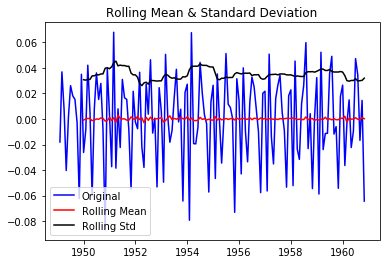

Results of Dickey-Fuller Test:
Test Statistic         -8.258453e+00
p-value                 5.160450e-13
#Lags Used              1.300000e+01
Number of Obs Used      1.280000e+02
Critical Value (1%)    -3.482501e+00
Critical Value (5%)    -2.884398e+00
Critical Value (10%)   -2.578960e+00
dtype: float64


In [27]:
decomposedLogData = residual 
decomposedLogData.dropna(inplace = True)
test_stationary(decomposedLogData)

C:\Users\Naeemah\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


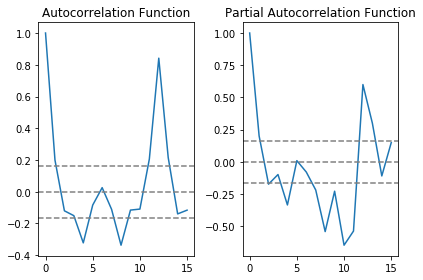

In [28]:
#ACF AND PACF PLOT

lag_acf = acf(datasetlogdiffshifting, nlags = 15)
lag_pacf = pacf(datasetlogdiffshifting, nlags = 15, method ='ols')

#plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting,)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting,)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')


#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting,)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting,)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Naeemah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Naeemah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


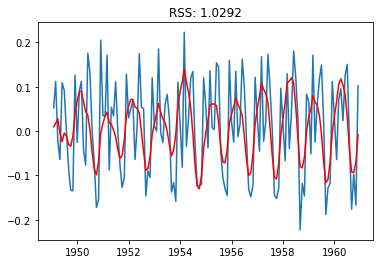

In [30]:
#AR MODEL 
model = ARIMA(indexedDataset_logscale, order = (2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetlogdiffshifting['#Passengers'])**2))
print('Plotting AR Model')

         

C:\Users\Naeemah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Naeemah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


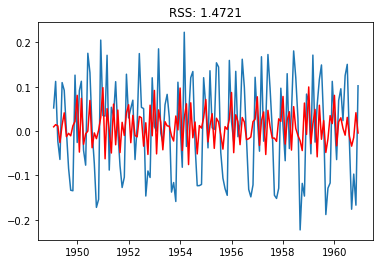

In [32]:
#MA MODEL 
model = ARIMA(indexedDataset_logscale, order = (0,1,2))
results_MA = model.fit(disp = -1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetlogdiffshifting['#Passengers'])**2))
print('Plotting MA Model')

C:\Users\Naeemah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Naeemah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

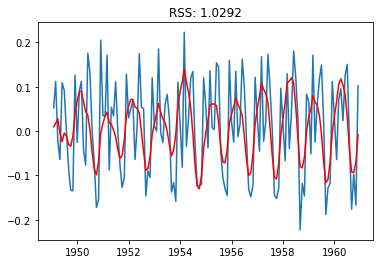

In [33]:
model = ARIMA(indexedDataset_logscale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetlogdiffshifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogdiffshifting['#Passengers'])**2))

In [34]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
predictions_ARIMA_diff

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
1949-12-01    0.037212
1950-01-01    0.068135
1950-02-01    0.089434
1950-03-01    0.090029
1950-04-01    0.066152
1950-05-01    0.044053
1950-06-01    0.035467
1950-07-01    0.003100
1950-08-01   -0.047127
1950-09-01   -0.086353
1950-10-01   -0.098465
1950-11-01   -0.067846
1950-12-01   -0.005227
1951-01-01    0.017385
1951-02-01    0.034016
1951-03-01    0.042561
1951-04-01    0.018748
1951-05-01    0.015260
1951-06-01    0.002489
1951-07-01   -0.012408
                ...   
1958-07-01    0.054477
1958-08-01   -0.016466
1958-09-01   -0.079842
1958-10-01   -0.083143
1958-11-01   -0.058869
1958-12-01   -0.002662
1959-01-01    0.031199
1959-02-01    0.051445
1959-03-01    0.079807
1959-04-01    0.065334
1959-05-01    0.058190
1959-06-01    0.036074
1959-

In [35]:
#Covert to cummlative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220143
1950-04-01    0.286294
1950-05-01    0.330348
1950-06-01    0.365815
1950-07-01    0.368915
1950-08-01    0.321788
1950-09-01    0.235435
1950-10-01    0.136970
1950-11-01    0.069123
1950-12-01    0.063896
1951-01-01    0.081281
1951-02-01    0.115297
1951-03-01    0.157858
1951-04-01    0.176606
1951-05-01    0.191865
1951-06-01    0.194355
1951-07-01    0.181947
                ...   
1958-07-01    1.166557
1958-08-01    1.150092
1958-09-01    1.070250
1958-10-01    0.987107
1958-11-01    0.928238
1958-12-01    0.925575
1959-01-01    0.956774
1959-02-01    1.008219
1959-03-01    1.088026
1959-04-01    1.153360
1959-05-01    1.211550
1959-06-01    1.247624
1959-

In [36]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale.iloc[0], index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

Month
1949-01-01         NaN
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220143
1950-04-01    0.286294
1950-05-01    0.330348
1950-06-01    0.365815
1950-07-01    0.368915
1950-08-01    0.321788
1950-09-01    0.235435
1950-10-01    0.136970
1950-11-01    0.069123
1950-12-01    0.063896
1951-01-01    0.081281
1951-02-01    0.115297
1951-03-01    0.157858
1951-04-01    0.176606
1951-05-01    0.191865
1951-06-01    0.194355
                ...   
1958-07-01    1.166557
1958-08-01    1.150092
1958-09-01    1.070250
1958-10-01    0.987107
1958-11-01    0.928238
1958-12-01    0.925575
1959-01-01    0.956774
1959-02-01    1.008219
1959-03-01    1.088026
1959-04-01    1.153360
1959-05-01    1.211550
1959-06-01    1.247624
1959-

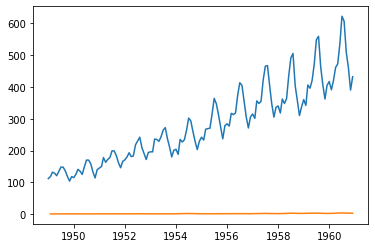

In [37]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)


In [38]:
indexedDataset_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


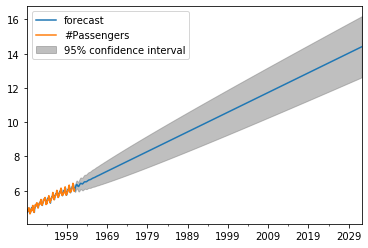

In [48]:
results_ARIMA.plot_predict(1,999)
x = results_ARIMA.forecast(steps=120)


In [40]:
x[1]

array([0.08384711, 0.10749462, 0.11568695, 0.11702775, 0.11703497,
       0.11744018, 0.1176225 , 0.11778713, 0.12024163, 0.12736042,
       0.13870959, 0.15118792, 0.16157813, 0.16834393, 0.17177328,
       0.17311981, 0.17358731, 0.17385458, 0.17430216, 0.1754333 ,
       0.17788146, 0.18195721, 0.18726216, 0.19283392, 0.19769243,
       0.20130638, 0.20369054, 0.20519831, 0.20625268, 0.20720998,
       0.2083697 , 0.21000326, 0.21229744, 0.21524478, 0.21860179,
       0.22198256, 0.22503064, 0.22755294, 0.22954806, 0.23114797,
       0.23253825, 0.23390534, 0.2354131 , 0.23718312, 0.23926538,
       0.24161538, 0.24410371, 0.24656357, 0.24885256, 0.25089629,
       0.25269733, 0.25431628, 0.25584312, 0.25737228, 0.2589839 ,
       0.2607285 , 0.26261548, 0.2646109 , 0.26664898, 0.26865481,
       0.27056849, 0.27236097, 0.27403701, 0.27562774, 0.27717829,
       0.27873527, 0.28033591, 0.28200018, 0.28372683, 0.2854951 ,
       0.28727211, 0.28902345, 0.29072337, 0.29236083, 0.29394

In [49]:
len(x[1])

120

In [50]:
np.exp(x[1])

array([1.08746262, 1.11348487, 1.12264437, 1.12415063, 1.12415874,
       1.12461435, 1.12481941, 1.12500461, 1.12776932, 1.13582632,
       1.14879044, 1.16321523, 1.17536428, 1.18334353, 1.18740859,
       1.18900855, 1.18956454, 1.18988252, 1.19041521, 1.1917625 ,
       1.1946837 , 1.19956286, 1.2059434 , 1.21268137, 1.21858754,
       1.22299942, 1.22591872, 1.22776852, 1.22906372, 1.23024087,
       1.23166844, 1.23368208, 1.23651561, 1.24016543, 1.24433567,
       1.2485496 , 1.25236109, 1.25552391, 1.25803133, 1.26004568,
       1.26179871, 1.26352488, 1.26543141, 1.26767323, 1.27031561,
       1.27330436, 1.2764767 , 1.27962052, 1.28255292, 1.28517679,
       1.28749353, 1.28957961, 1.29155009, 1.29352659, 1.29561295,
       1.29787524, 1.30032662, 1.3029239 , 1.30558209, 1.30820348,
       1.31070936, 1.31306089, 1.31526348, 1.31735737, 1.31940159,
       1.32145747, 1.32357435, 1.32577896, 1.32807009, 1.33042056,
       1.33278683, 1.33512304, 1.33739457, 1.3395863 , 1.34170